Jamison Hunter

August 9, 2023

#Resampling Date Time Data

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/london_weather_MODIFIED - london_weather_MODIFIED.csv"
df = pd.read_csv(path)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


Convert the date column to datetime dtype.

In [4]:
#Add a datetime column based on the string in the "date" column
df['datetime'] = pd.to_datetime(df['date'], format = "%Y%m%d")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03


In [5]:
## preview first row from the date column (string)
df.loc[0,'date']

19790101

In [6]:
df["datetime"].dt.year.unique()

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

Set the date column as the index.

In [7]:
# set 'date' as the index
df = df.set_index('datetime')

In [8]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq=None)

Filter out only the required data:
* Keep only data from the year 2000 or later.
* Keep only the following features:
* precipitation
* mean_temp
* min_temp
* max_temp
* snow_depth


In [9]:
# slicing data to only include 2000 to 2020
df = df.loc["2000" : "2020"]
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
2000-01-01,20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [10]:
df = df.drop(columns = ["cloud_cover", "sunshine", "global_radiation", "pressure"])
df.head(3)

,date,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,,
2000-01-01,20000101,10.8,7.0,4.9,0.0,0.0
2000-01-02,20000102,11.5,7.9,5.0,0.2,0.0
2000-01-03,20000103,9.5,9.4,7.2,6.0,0.0


Impute any missing values.
* Think about each feature and what imputation method makes sense.
* You may not be able to use the same method for every feature!

In [11]:
# stating the number of rows and columns in the data set
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 7671 rows and 6 columns.


In [12]:
# checking for duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [13]:
# checking for missing values
df.isna().sum()

date                0
max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

There are missing values, which I will need to address.

Before imputing, I want to create a few good visualizations in order to get a better sense for what is going on within the data.

In [14]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)

<ipython-input-14-bd6c69c0d351>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-14-bd6c69c0d351>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


Text(0.5, 1.0, 'Maximum Temperature Over Time')

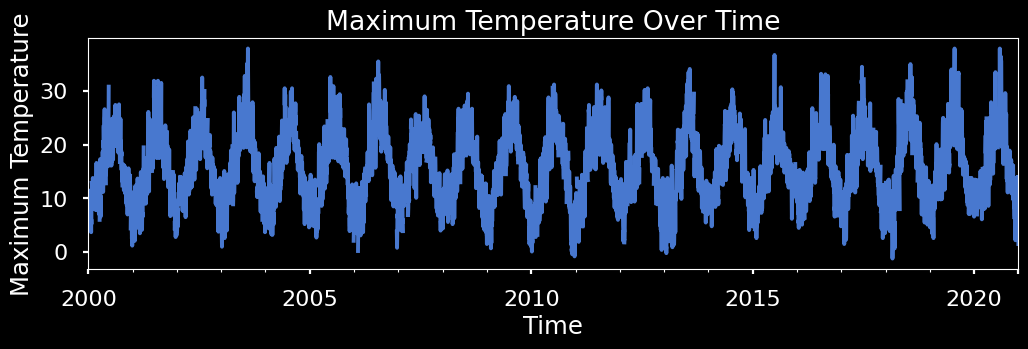

In [15]:
ts = df["max_temp"].copy()
ax = ts.plot()
ax.set_xlabel("Time")
ax.set_ylabel("Maximum Temperature")
ax.set_title("Maximum Temperature Over Time")

datetime
2000-01-01    10.8
2000-01-02    11.5
2000-01-03     9.5
2000-01-04    11.0
2000-01-05    10.8
              ... 
2020-12-27     7.5
2020-12-28     3.6
2020-12-29     4.1
2020-12-30     5.6
2020-12-31     1.5
Name: max_temp, Length: 7671, dtype: float64


Text(0.5, 1.0, 'Maximum Temperature Over Time Interpolated')

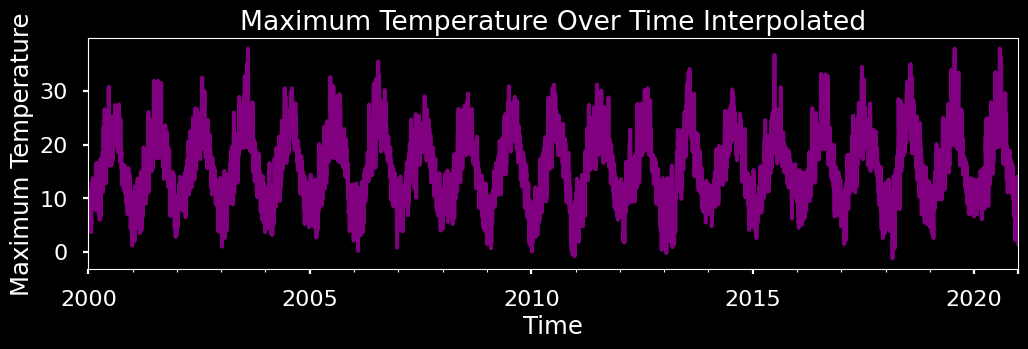

In [16]:
ts_interp = ts.interpolate()
print(ts_interp)
ax = ts_interp.plot(color='purple');
ax.set_xlabel("Time")
ax.set_ylabel("Maximum Temperature")
ax.set_title("Maximum Temperature Over Time Interpolated")

Text(0.5, 1.0, 'Mean Temperature Over Time')

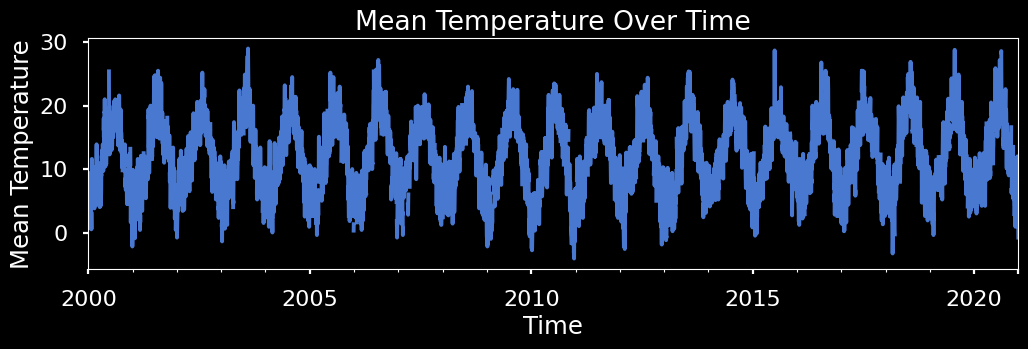

In [17]:
ts = df["mean_temp"].copy()
ax = ts.plot()
ax.set_xlabel("Time")
ax.set_ylabel("Mean Temperature")
ax.set_title("Mean Temperature Over Time")

datetime
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64


Text(0.5, 1.0, 'Mean Temperature Over Time Interpolated')

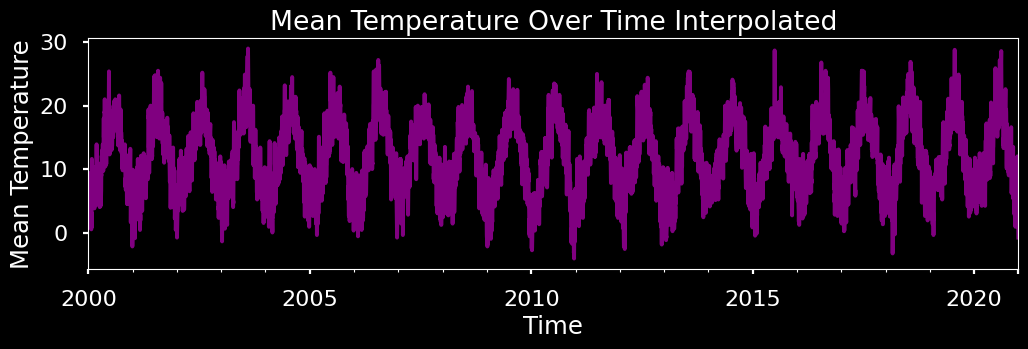

In [18]:
ts_interp = ts.interpolate()
print(ts_interp)
ax = ts_interp.plot(color='purple');
ax.set_xlabel("Time")
ax.set_ylabel("Mean Temperature")
ax.set_title("Mean Temperature Over Time Interpolated")

Text(0.5, 1.0, 'Minimum Temperature Over Time')

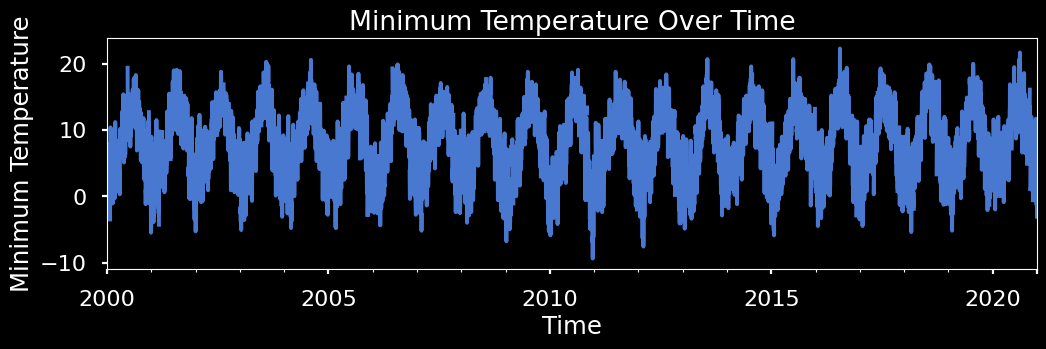

In [19]:
ts = df["min_temp"].copy()
ax = ts.plot()
ax.set_xlabel("Time")
ax.set_ylabel("Minimum Temperature")
ax.set_title("Minimum Temperature Over Time")

datetime
2000-01-01    4.9
2000-01-02    5.0
2000-01-03    7.2
2000-01-04    4.4
2000-01-05    1.9
             ... 
2020-12-27    7.6
2020-12-28   -1.3
2020-12-29    1.1
2020-12-30   -0.1
2020-12-31   -3.1
Name: min_temp, Length: 7671, dtype: float64


Text(0.5, 1.0, 'Minimum Temperature Over Time Interpolated')

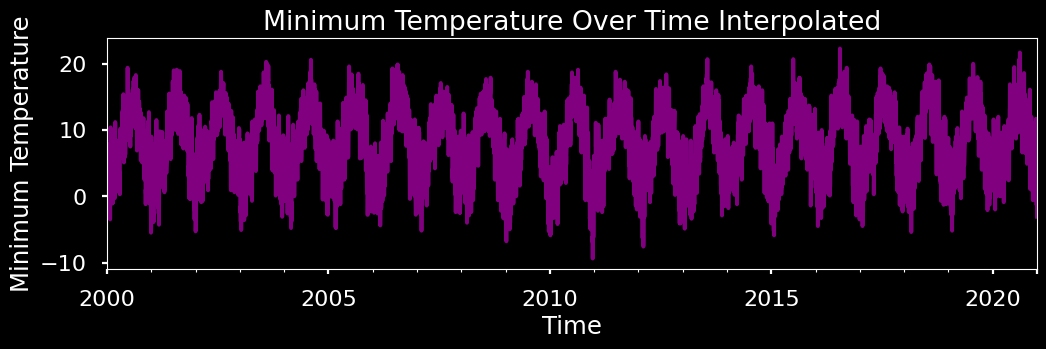

In [20]:
ts_interp = ts.interpolate()
print(ts_interp)
ax = ts_interp.plot(color='purple');
ax.set_xlabel("Time")
ax.set_ylabel("Minimum Temperature")
ax.set_title("Minimum Temperature Over Time Interpolated")

Text(0.5, 1.0, 'Precipitation Over Time')

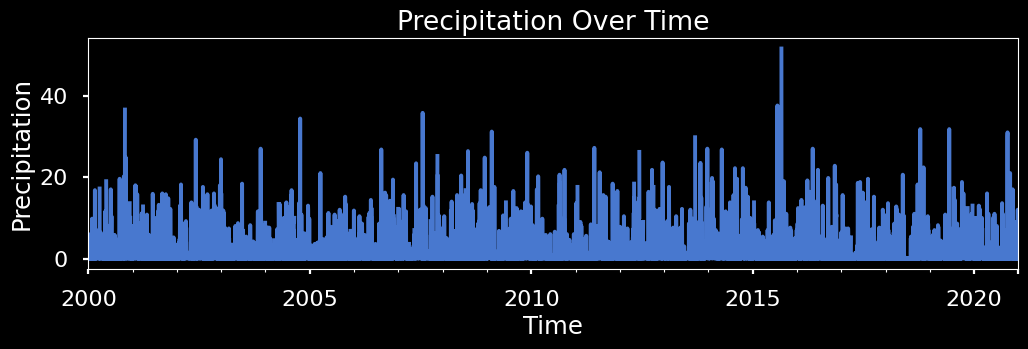

In [21]:
ts = df["precipitation"].copy()
ax = ts.plot()
ax.set_xlabel("Time")
ax.set_ylabel("Precipitation")
ax.set_title("Precipitation Over Time")

datetime
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2020-12-27    2.0
2020-12-28    0.2
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Name: precipitation, Length: 7671, dtype: float64


Text(0.5, 1.0, 'Precipitation Over Time Interpolated')

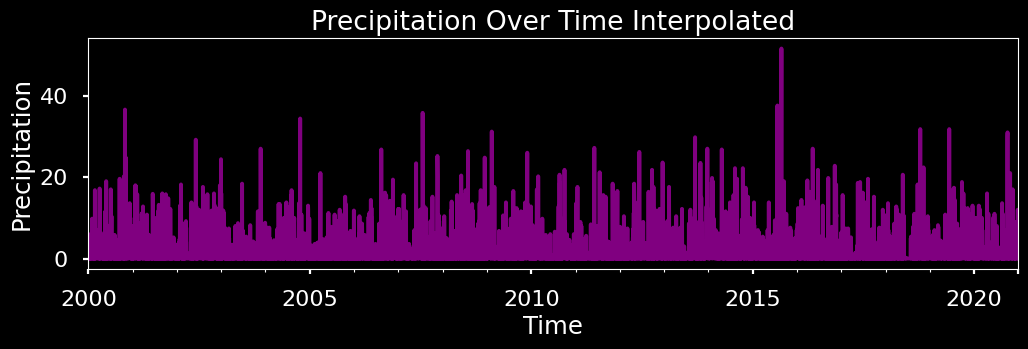

In [22]:
ts_interp = ts.interpolate()
print(ts_interp)
ax = ts_interp.plot(color='purple');
ax.set_xlabel("Time")
ax.set_ylabel("Precipitation")
ax.set_title("Precipitation Over Time Interpolated")

Text(0.5, 1.0, 'Snow Depth Over Time')

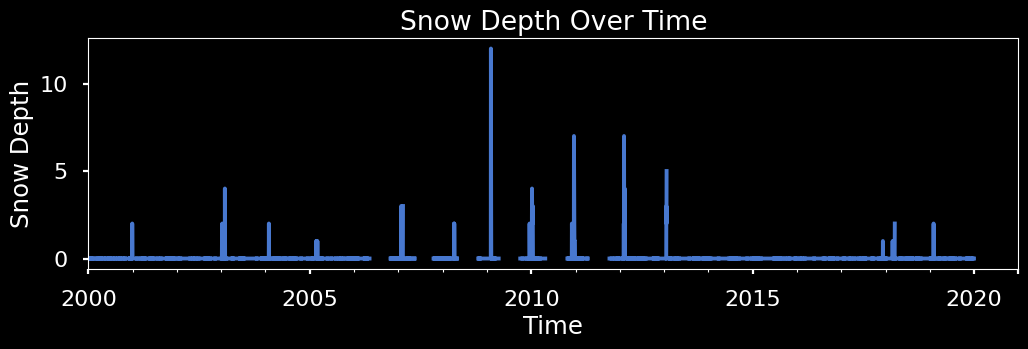

In [23]:
ts = df["snow_depth"].copy()
ax = ts.plot()
ax.set_xlabel("Time")
ax.set_ylabel("Snow Depth")
ax.set_title("Snow Depth Over Time")

datetime
2000-01-01    0.0
2000-01-02    0.0
2000-01-03    0.0
2000-01-04    0.0
2000-01-05    0.0
             ... 
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Name: snow_depth, Length: 7671, dtype: float64


Text(0.5, 1.0, 'Snow Depth Over Time Interpolated')

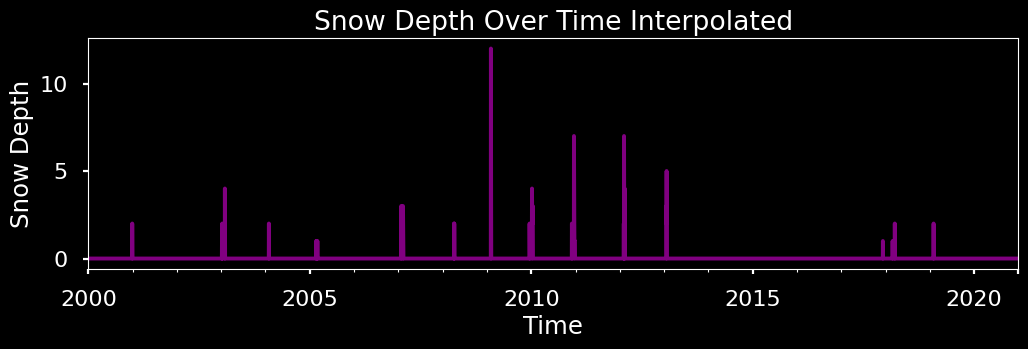

In [24]:
ts_interp = ts.interpolate()
print(ts_interp)
ax = ts_interp.plot(color='purple');
ax.set_xlabel("Time")
ax.set_ylabel("Snow Depth")
ax.set_title("Snow Depth Over Time Interpolated")

Since I do not have a reason to not use linear interpolation based on the above graphs, I will fill any null values with linearly interpolated data.

In [25]:
# Using linear interpolation to fill missing data
df = df.interpolate()
df.isna().sum()

date             0
max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

# What month had the most precipitation between 2000 through 2010?

In [26]:
df_q1 = df.loc["2000" : "2010"]
df_q1

,date,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,,
2000-01-01,20000101,10.8,7.0,4.9,0.0,0.0
2000-01-02,20000102,11.5,7.9,5.0,0.2,0.0
2000-01-03,20000103,9.5,9.4,7.2,6.0,0.0
2000-01-04,20000104,11.0,7.0,4.4,0.2,0.0
2000-01-05,20000105,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...,...
2010-12-27,20101227,8.0,0.2,-4.6,5.0,1.0
2010-12-28,20101228,9.5,5.3,2.5,0.4,0.0
2010-12-29,20101229,7.7,6.8,4.1,1.4,0.0


In [27]:
df_q1["precipitation"].idxmax()

Timestamp('2000-10-29 00:00:00')

In [28]:
r = pd.date_range(start = "2000-01-01", end = "2010-12-31", freq = "M")
mean_list = []
date_list = []
for i in r:
  y = df.loc[i,'precipitation'].mean()
  mean_list.append(y)
  date_list.append(i)
m = max(mean_list)
ind = mean_list.index(m)
print(m)
print(date_list[ind])

13.8
2002-04-30 00:00:00


The month of highest average precipitation between the year 2000 and 2010 is April of 2002.

In [29]:
loc_1year = mdates.MonthLocator(interval=12)

fmt_years = mdates.DateFormatter("%Y")

loc_3months = mdates.MonthLocator(interval=3)

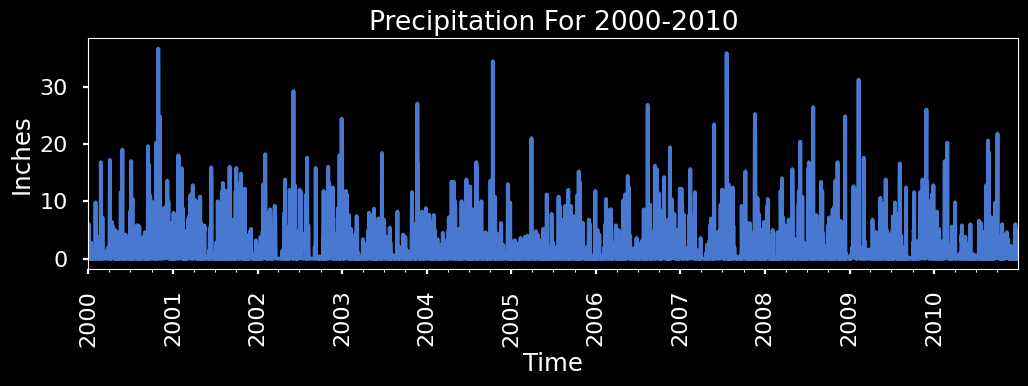

In [30]:
ts = df_q1["precipitation"]
ax = ts.plot();
ax.xaxis.set_major_locator(loc_1year)
ax.xaxis.set_major_formatter(fmt_years)
ax.xaxis.set_minor_locator(loc_3months)
ax.set_xlabel("Time")
ax.set_ylabel("Inches")
ax.set_title("Precipitation For 2000-2010")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

# Which year between 2000-2020 had the coolest average temperature?

In [31]:
pd.date_range(start = "2000-01-01", end = "2020-12-31", freq = "Y")

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [32]:
r = pd.date_range(start = "2000-01-01", end = "2020-12-31", freq = "Y")
mean_list = []
date_list = []
for i in r:
  y = df.loc[i,'mean_temp'].mean()
  mean_list.append(y)
  date_list.append(i)
m = min(mean_list)
ind = mean_list.index(m)
print(m)
print(date_list[ind])

-0.8
2008-12-31 00:00:00


The coldest average temperature in one year was measures at -0.8 in 2008.

In [39]:
loc_5years = mdates.MonthLocator(interval=60)

fmt_years = mdates.DateFormatter("%Y")

loc_1year = mdates.MonthLocator(interval=12)

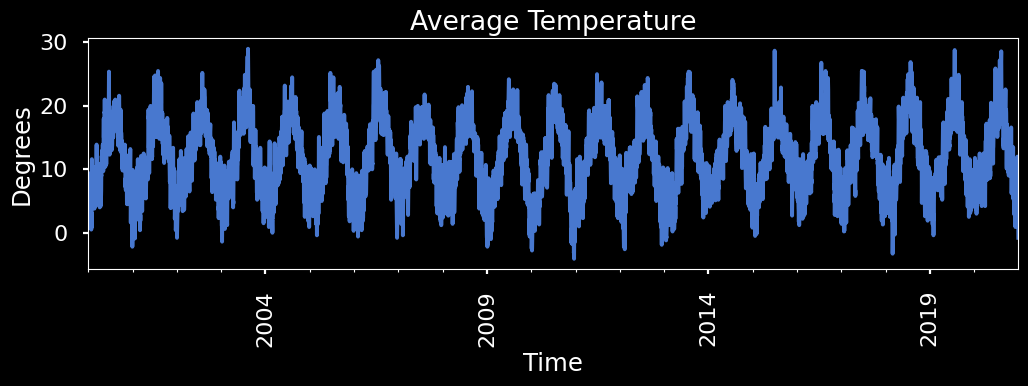

In [49]:
ts = df["mean_temp"]
ax = ts.plot();
ax.xaxis.set_major_locator(loc_5years)
ax.xaxis.set_major_formatter(fmt_years)
ax.xaxis.set_minor_locator(loc_1year)
ax.set_xlabel("Time")
ax.set_ylabel("Degrees")
ax.set_title("Average Temperature")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)